<a href="https://colab.research.google.com/github/sdf-works/sam-learns-ML/blob/main/bbs_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building my first model
making sure I know how to build a model, train it, and look at the loss curve

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [3]:
#define variables

x = np.linspace(-1,1,100) #define array

#check and look cus we're taking it sloooow
print(x[:5])       # peek at first few values
print(x.shape)     # should be 100 spaces

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192]
(100,)


[-1.         -0.93939394 -0.87878788 -0.81818182 -0.75757576]


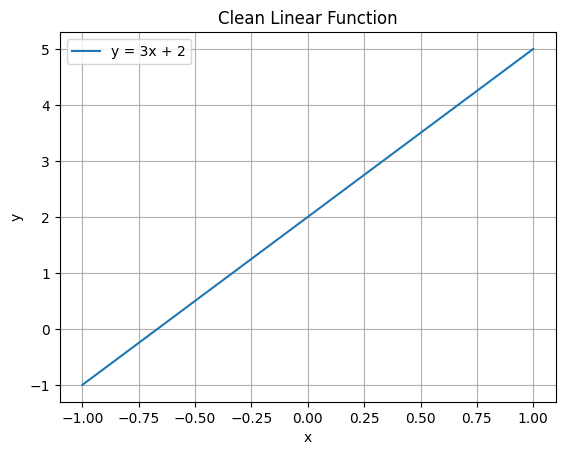

x = -0.010, y = 1.970


In [4]:
#set true function
y = 3 * x + 2

print(y[:5]) #always a check

#graph cus yes we checking again
plt.plot(x, y, label="y = 3x + 2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Clean Linear Function")
plt.grid(True)
plt.legend()
plt.show()

#even more checking
idx = np.argmin(np.abs(x - 0))
print(f"x = {x[idx]:.3f}, y = {y[idx]:.3f}")

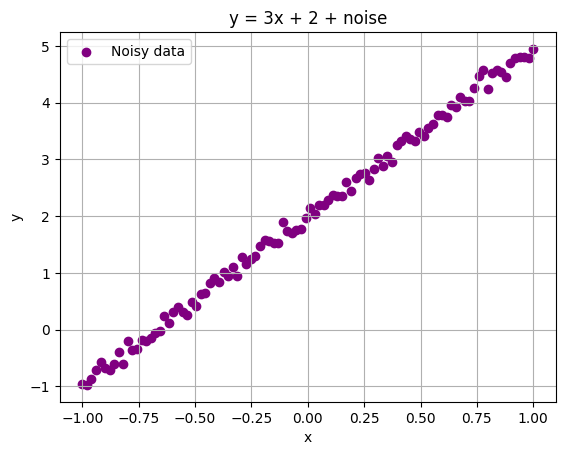

In [5]:
#add noise to line (turn it up to 11)

y = y + 0.1 * np.random.randn(*x.shape) #i could just write the dimensions but made it easier on my future self

#graph always
plt.scatter(x, y, label="Noisy data", color='purple')
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = 3x + 2 + noise")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
#convert variables to tensors

x_tensor = torch.from_numpy(x).float().unsqueeze(1)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

#check again
print(x_tensor.shape)   # should be [100, 1]
print(y_tensor.shape)   # should be [100, 1]

torch.Size([100, 1])
torch.Size([100, 1])


In [9]:
#regression

model = nn.Linear(in_features=1, out_features=1) #this is the y hat vector that learns slope and intercept

print("Initial weight:", model.weight.data)
print("Initial bias:", model.bias.data)

#model guess
y_hat = model(x_tensor)

print(y_hat[:5])

Initial weight: tensor([[-0.2244]])
Initial bias: tensor([-0.9941])
tensor([[-0.7697],
        [-0.7742],
        [-0.7788],
        [-0.7833],
        [-0.7878]], grad_fn=<SliceBackward0>)


In [20]:
#define loss function

criterion = nn.MSELoss()

# Forward pass
y_hat = model(x_tensor)
loss = criterion(y_hat, y_tensor)

# Before training step
print("Before step:")
print("  Weight:", model.weight.data.item())
print("  Bias:  ", model.bias.data.item())
print("  Loss:  ", loss.item())

# Set up optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training step
loss.backward()
optimizer.step()
optimizer.zero_grad()

# Recalculate loss
loss = criterion(model(x_tensor), y_tensor)

# After training step
print("\nAfter step:")
print("  Weight:", model.weight.data.item())
print("  Bias:  ", model.bias.data.item())
print("  Loss:  ", loss.item())

Before step:
  Weight: -0.007136341650038958
  Bias:   -0.394441157579422
  Loss:   8.774738311767578

After step:
  Weight: 0.19532345235347748
  Bias:   0.08525321632623672
  Loss:   6.3078179359436035


In [27]:
#training in a loop

num_epochs = 50
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

    # 6. Print progress
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        w = model.weight.data.item()
        b = model.bias.data.item()
        print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | w: {w:.4f} | b: {b:.4f}")

Epoch   0 | Loss: 0.0110 | w: 2.8932 | b: 2.0040
Epoch  10 | Loss: 0.0093 | w: 2.9319 | b: 2.0040
Epoch  20 | Loss: 0.0088 | w: 2.9510 | b: 2.0040
Epoch  30 | Loss: 0.0087 | w: 2.9604 | b: 2.0040
Epoch  40 | Loss: 0.0087 | w: 2.9651 | b: 2.0040
Epoch  49 | Loss: 0.0087 | w: 2.9672 | b: 2.0040


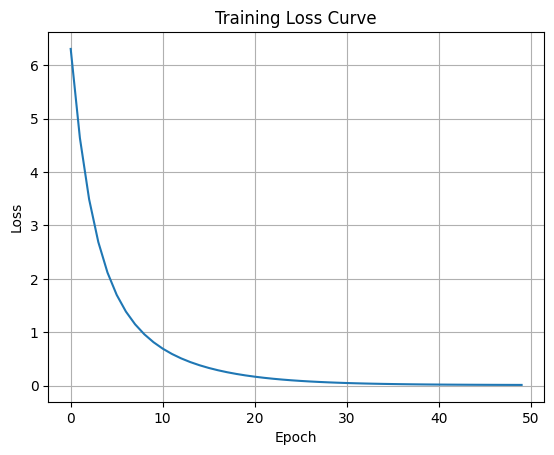

In [22]:
#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

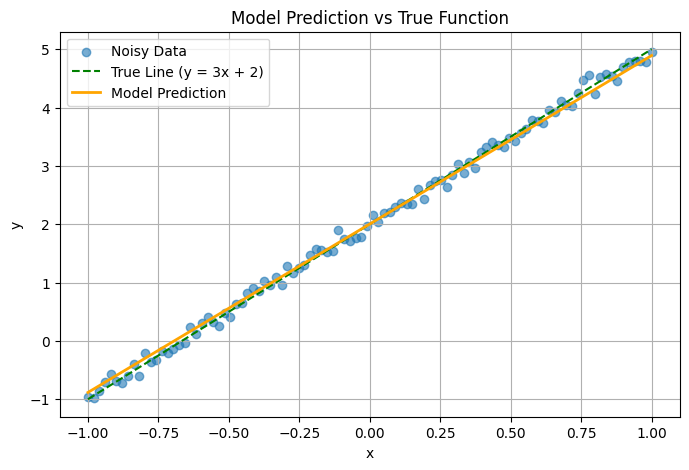

In [25]:
#plot model predictions vs data

# Get final predictions
y_hat = model(x_tensor).detach().numpy()
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()

y_true_line = 3 * x_vals + 2

# Plot everything
plt.figure(figsize=(8, 5))

plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Line (y = 3x + 2)", linestyle="--", color="green")
plt.plot(x_vals, y_hat, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.show()

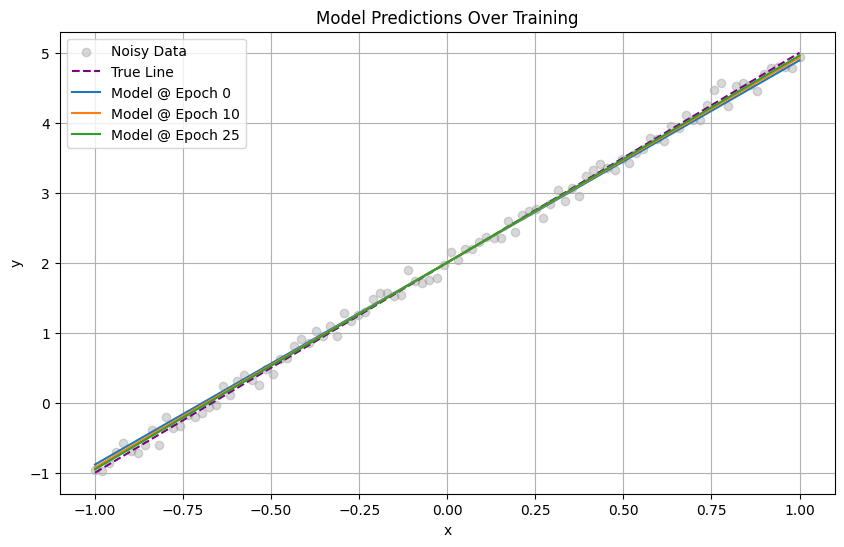

In [29]:
#model prediction over iterations

# Get x, y data for plotting
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_line = 3 * x_vals + 2

# Plot setup
plt.figure(figsize=(10, 6))

plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.3, color="gray")
plt.plot(x_vals, y_line, "--", label="True Line", color="purple")

# Plot model predictions at each snapshot
for epoch, y_pred in snapshots.items():
    plt.plot(x_vals, y_pred, label=f"Model @ Epoch {epoch}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions Over Training")
plt.legend()
plt.grid(True)
plt.show()

## 🧠 Wrap-Up: What Did We Just Do?

We built a complete machine learning pipeline from scratch, using PyTorch, and learned exactly what each part does:

- Generated toy data from the function `y = 3x + 2` with added noise
- Created a simple linear model with one weight and one bias
- Defined a loss function (MSE) to measure how wrong the model was
- Used stochastic gradient descent (SGD) to update the model step by step
- Tracked weight, bias, and loss over time
- Visualized how predictions evolved across epochs
- Compared the model's final line to the noisy data and the true function

---

## 🔍 Final Questions to Reflect On

### 🧠 Model Behavior
- What exactly did the model *learn*?
    - The model learned the slope of the line by evaluating the relationship between different points

- How close did the final weight and bias get to 3 and 2?
    - Loss: 0.0087 | w: 2.9672 | b: 2.0040
  
- What does the shape of the loss curve tell you?
  - It shows how close the model is to converging on the truth

### ⚙️ ML Mechanics
- Why does `.backward()` calculate gradients?
  - `.backward()` calculates gradients because it calculates the derivative between weight and bias compared to loss.
- Why do we need `optimizer.zero_grad()`?
  - If we don't use `optimizer.zero_grad()`, then all of the gradients will add up and confuse our model.
- What role does the learning rate play in how fast the model updates?
  - Learning rates constrains how big of a step the model can take in trying to match the truth.

### 📈 Visual Takeaways
- Why did the model overpredict at one end and underpredict at the other?
  - The slope is not correct.
- How did the predictions change from epoch 0 to 50?
  - The predictions had lower loss and were closer to the true function at the end of the loops
- What does the final learned line tell you about the model's ability to generalize from noisy data?
  - The final line says the model did pretty good but was still confused in some ways.

---

## 💡 Next Ideas
- Try training for more epochs — does the slope converge better?
- What happens if you reduce or increase the noise?
- Try changing the learning rate — what’s too small? what’s too big?
- Replace the linear model with a slightly more complex one (e.g., `nn.Sequential` with a hidden layer)

## 🧮 Appendix: Full Math Breakdown of the Training Step

### 🧠 The Model

We built a linear model:

$$
\hat{y} = wx + b
$$

Where:
- $w$ = the slope (weight), learned from data  
- $b$ = the intercept (bias), also learned  
- $\hat{y}$ = the model's predicted output

---

### 📈 The Loss Function

We used **Mean Squared Error (MSE)** to measure how wrong the model's predictions were:

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $y_i$ = true value  
- $\hat{y}_i$ = model's predicted value  
- The loss is a **single number** summarizing model performance.

---

### 🔁 The Update Rule (Gradient Descent)

PyTorch handles the calculus under the hood via `.backward()`, but conceptually, the model updates its weights and bias by computing:

$$
\frac{\partial \text{Loss}}{\partial w}, \quad \frac{\partial \text{Loss}}{\partial b}
$$

Then applies the update using **stochastic gradient descent (SGD)**:

$$
w = w - \eta \cdot \frac{\partial \text{Loss}}{\partial w}
$$

$$
b = b - \eta \cdot \frac{\partial \text{Loss}}{\partial b}
$$

Where:
- $\eta$ = learning rate (e.g. 0.1)  
- These updates happen once per training step (epoch)

---

### 📉 What Training Actually Looked Like

Example (real results!):

**Before step:**

$$
w = -0.0071, \quad b = -0.3944, \quad \text{Loss} = 8.7747
$$

**After one step:**

$$
w = 0.1953, \quad b = 0.0853, \quad \text{Loss} = 6.3078
$$

---

### ✨ Summary

At each epoch, the model:
1. Makes predictions with its current $w$ and $b$
2. Calculates how wrong those predictions are (loss)
3. Uses gradients (calculus!) to find the best direction to adjust
4. Updates its internal weights accordingly
5. Repeats until it converges